In [39]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset import MidiDataset
print(torch.__version__)
print(torch.version.cuda)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.1+cu118
11.8


In [40]:
full_dataset = MidiDataset(
        midi_dir=config.data.midi_dir,
        num_bars=config.data.num_bars,
        steps_per_bar=config.data.steps_per_bar,
        verbose=True
    )

Dataset contains 499 MIDI samples.
Succesfully processed 499 MIDI samples.


## Reconstruction

Error: Weights not found at C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_0.pth
Processing file: C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\dataset\maestro-v3.0.0\MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--1.midi


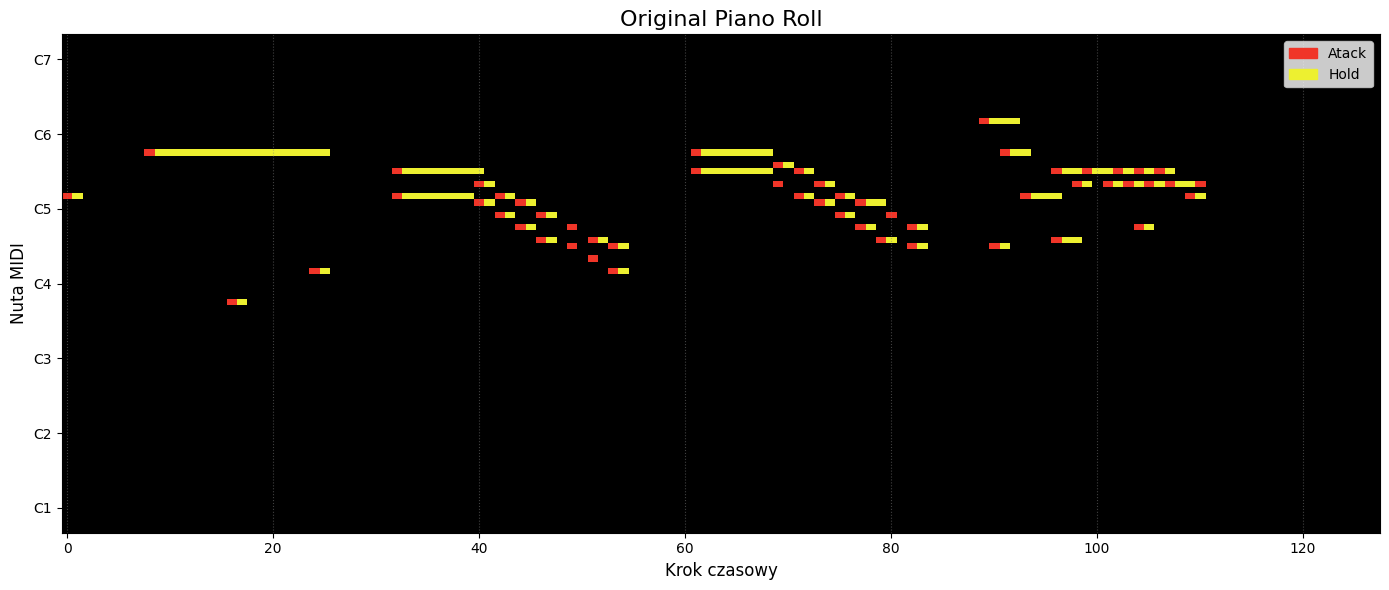

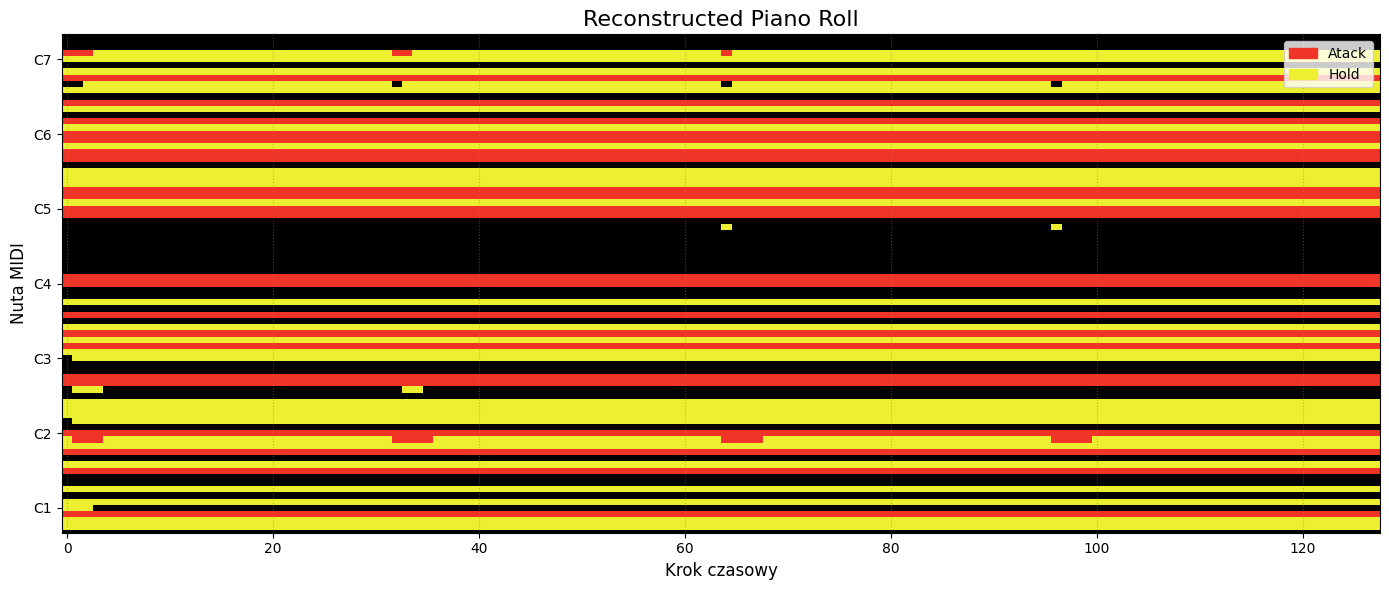

________________________________________________________________________________________________________________________

Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_5.pth
Processing file: C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\dataset\maestro-v3.0.0\MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--2.midi


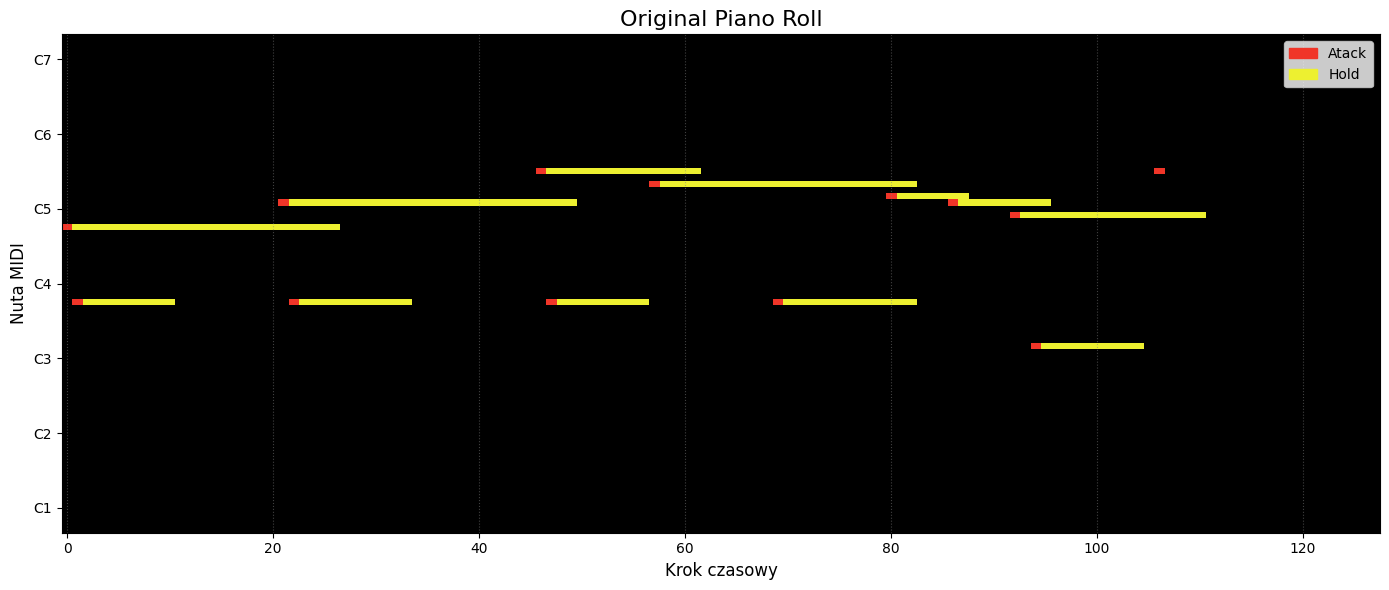

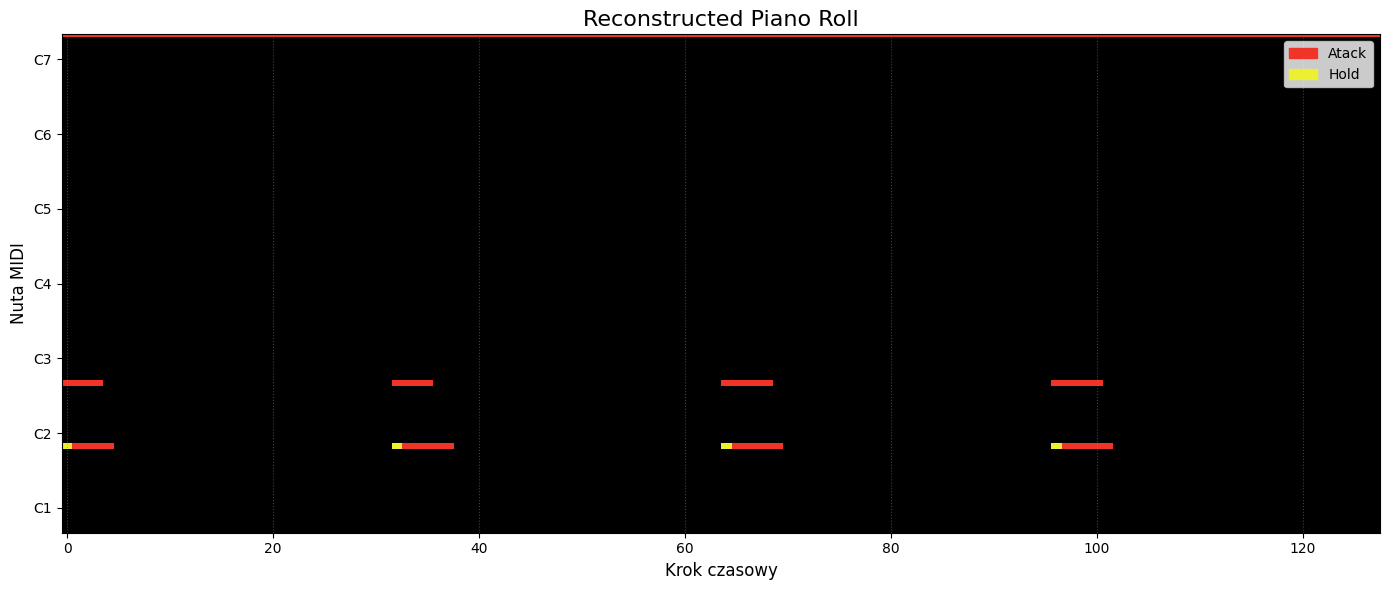

________________________________________________________________________________________________________________________



In [41]:
for i in range(2):
    model = LofiModel()
    model.load_weights(fr"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_{5*i}.pth")
    original_sequence_tensor, file_name = full_dataset[i]
    print(f"Processing file: {file_name}")
    reconstructions = model.reconstruct(original_sequence_tensor)
    print(60*"__"+"\n")

In [42]:
reconstructions

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')